# An Intro to Web Scraping Efficiently - A Python Tutorial


## Imports

In order to scrape and visualize the data we'll need the following libraries.

In [1]:
import pandas as pd
import requests
import json
from bs4 import BeautifulSoup

from tabulate import tabulate

## Getting the data

Let's perform the request using the `GET` method.

In [2]:
response = requests.get('https://projects.fivethirtyeight.com/soccer-predictions/forecasts/2022_serie-a_forecast.json')
# print(response.content)

In [3]:
data = json.loads(response.content)

In [4]:
df = pd.DataFrame()
for forecast in data['forecasts']:
    aux_df = pd.DataFrame(forecast['teams'])
    aux_df = aux_df.assign(forecast_date = forecast['last_updated'])
    df = pd.concat([df, aux_df])
# print(tabulate(df.head(), tablefmt='pipe', headers='keys'))
df.head()

,code,current_losses,current_points,current_ties,current_wins,d_rating,global_d,global_o,global_rating,goal_diff,...,position_7,position_8,position_9,promoted,relegated,sdr_id,ties,win_league,wins,forecast_date
0,UDI,1.0,19.0,1.0,6.0,1.36554,0.99100,1.89377,66.00788,14.77135,...,0.11305,0.09825,0.08030,0.0,0.00155,73833,8.47645,0.04065,18.56300,2022-10-06T21:01:41Z
1,ROM,2.0,16.0,1.0,5.0,1.12789,0.75335,2.02779,73.97480,18.30385,...,0.09645,0.07410,0.05420,0.0,0.00050,73831,8.43280,0.06990,19.85075,2022-10-06T21:01:41Z
2,NAP,0.0,20.0,2.0,6.0,1.08305,0.70851,2.51226,81.77497,44.38340,...,0.02195,0.01185,0.00700,0.0,0.00005,73848,8.18975,0.45350,24.27550,2022-10-06T21:01:41Z
3,LAZ,1.0,17.0,2.0,5.0,1.32063,0.94609,2.05024,69.89789,22.35770,...,0.10820,0.09355,0.07225,0.0,0.00115,73834,9.26975,0.04190,18.57600,2022-10-06T21:01:41Z
4,LEC,3.0,7.0,4.0,1.0,1.47306,1.09852,1.35504,51.73676,-17.21595,...,0.01095,0.01740,0.02645,0.0,0.29020,73898,12.10795,0.00005,8.51755,2022-10-06T21:01:41Z


## The Visual

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
from highlight_text import ax_text, fig_text

from PIL import Image
import urllib
import os

In [6]:
plt.style.use("../assets/stylesheets/soc_base.mplstyle")
main_path = "../assets/fonts/"

for x in os.listdir(main_path):
    for y in os.listdir(f"{main_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{main_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y)
            except Exception as e:
                continue

In [7]:
df['forecast_date'] = pd.to_datetime(df['forecast_date'])
df = df[df['forecast_date'] == df['forecast_date'].max()]
df = df[['id', 'name', 'position_1', 'make_champs', 'relegated', 'points']]
df = df.sort_values(by=['position_1', 'points']).reset_index(drop=True)

In [8]:
df.head()

,id,name,position_1,make_champs,relegated,points
0,2734,Sampdoria,0.0,0.00035,0.50925,32.2229
1,3240,Salernitana,0.0,0.00110,0.38200,35.3356
2,4056,Spezia,0.0,0.00180,0.33615,36.6297
3,107,Bologna,0.0,0.00335,0.27705,38.3070
4,4007,Monza,0.0,0.00320,0.23935,39.3751


c:\Users\migue\Documents\Personal\Son of a corner\matplotlib-tutorials\.TutorialsVenv\lib\site-packages\ipykernel_launcher.py:42: UserWarning: Trying to register the cmap 'SOC' which already exists.


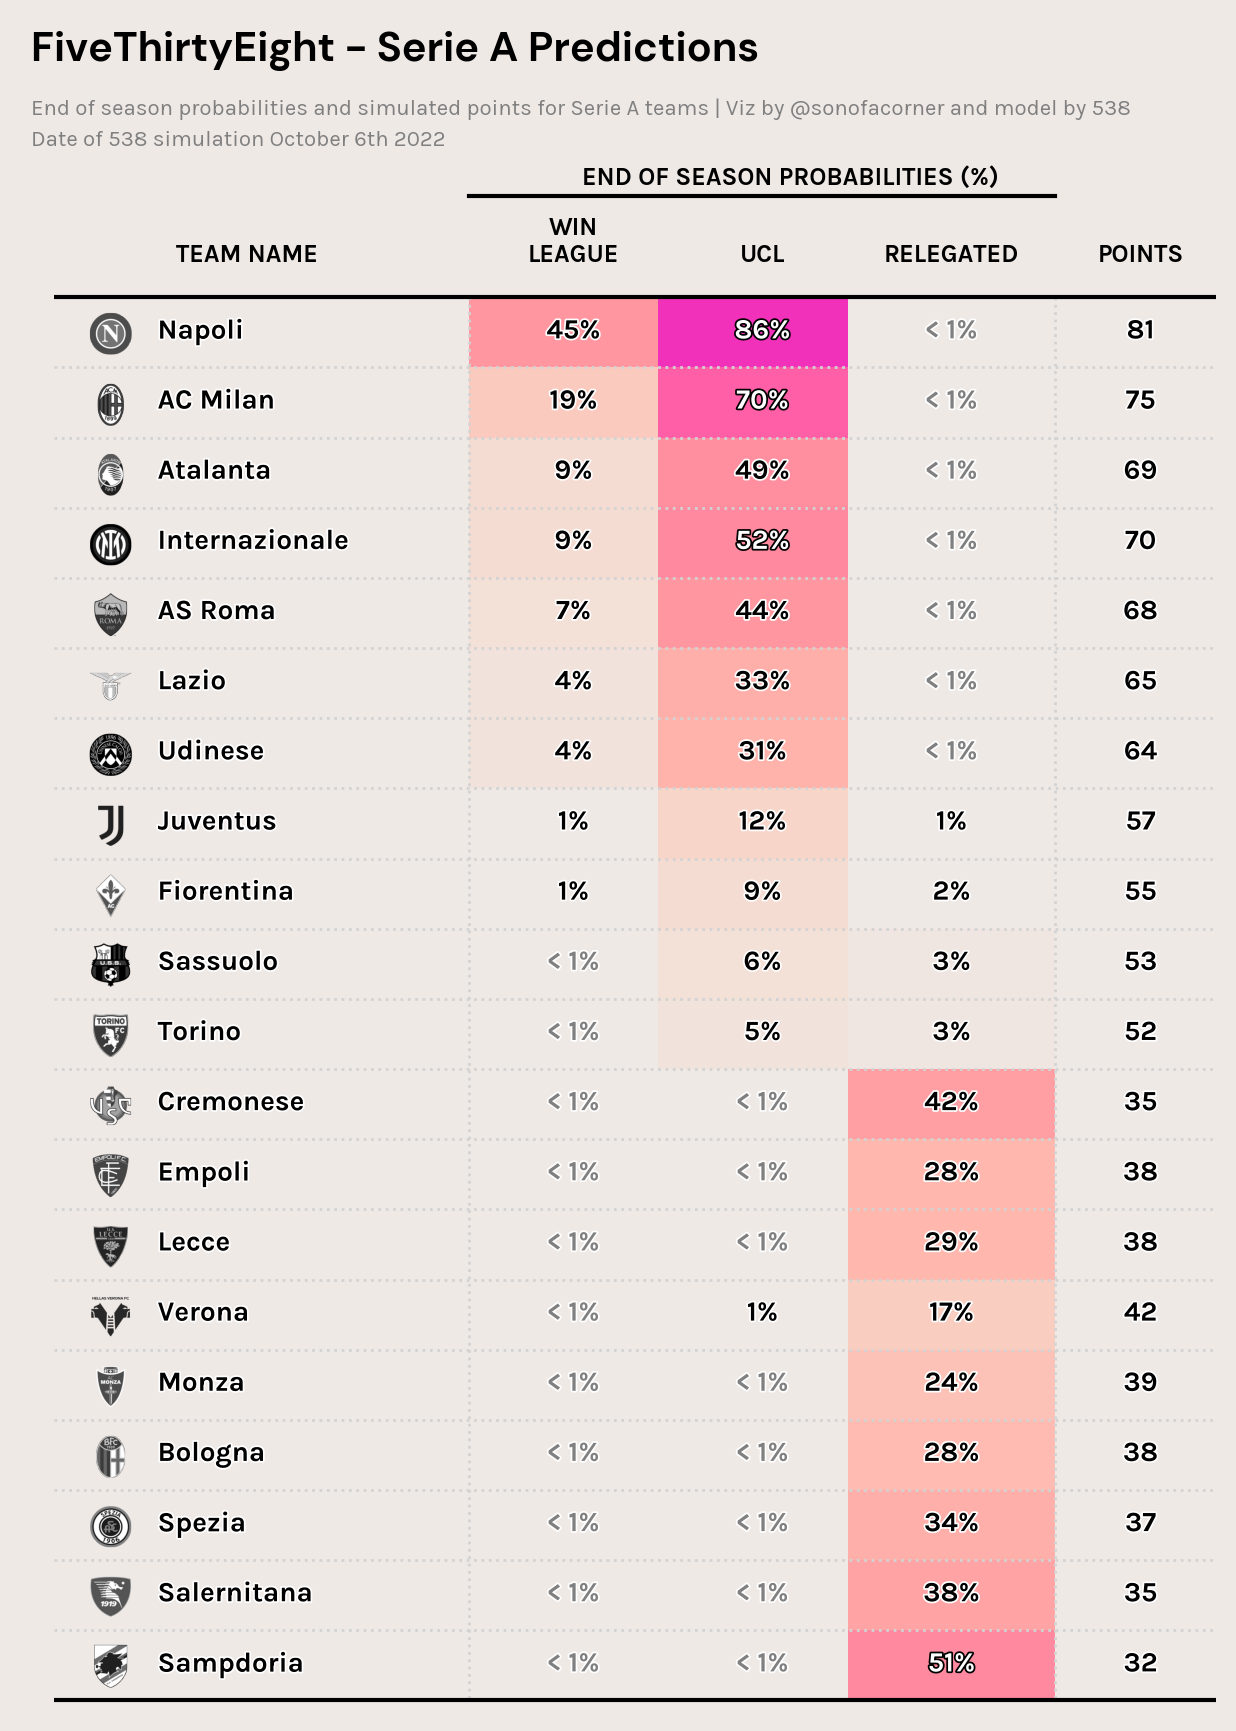

In [18]:
fig = plt.figure(figsize=(7.5, 10), dpi = 200)
ax = plt.subplot(111, facecolor = "#EFE9E6")

ncols = 6
nrows = df.shape[0]

ax.set_xlim(-0.65, ncols - 0.5)
ax.set_ylim(-0.65, nrows + 1.3)

# --- Define URL, colors and helper functions --------------------------------

espn_url = "https://secure.espn.com/combiner/i?img=/i/teamlogos/soccer/500/"

DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# Native data to normalized data coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

colors = [
    '#efe9e6',
    '#f2e1d9',
    '#f6d8cd',
    '#f9cfc2',
    '#fcc5b9',
    '#ffbbb1',
    '#ffb1aa',
    '#ffa7a5',
    '#ff9ca2',
    '#ff919f',
    '#ff869f',
    '#ff7a9f',
    '#ff6ea2',
    '#ff61a5',
    '#ff55a9',
    '#fd47af',
    '#f73ab6',
    '#f02cbd',
    '#e61ec6',
    '#db0fcf',
]
soc_cm = LinearSegmentedColormap.from_list("SOC", colors, N=50)
cm.register_cmap(name="SOC", cmap=soc_cm)
cmap = cm.get_cmap("SOC")
for x in range(0, ncols):
    for y in range(0, nrows):

        label_ = df.iloc[y, x]
        offset_x = -0.1
        color = "black"
        color_2 = "white"
        weight = "normal"
        # -- Team name
        if x == 0:
            ax_coords = DC_to_NFC([x - 0.47, y - 0.45])
            logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = "W")
            club_icon = Image.open(urllib.request.urlopen(f"{espn_url}{label_:.0f}.png&w=200")).convert("LA")
            logo_ax.imshow(club_icon)
            logo_ax.axis("off")
            continue
        elif x == 1:
            text = label_
            ha = "left"
        elif x < 5:
            if label_ > 0.005:
                text = f"{label_:.0%}"
            else:
                text = "< 1%"
                color = "gray"
            offset_x = 1.1
            ha = "center"
            if label_ > 0.5:
                color = "white"
                color_2 = "black"
            ax.fill_between(
                x = [(x - 1) + offset_x/2, (x - 1) + offset_x + offset_x/2],
                y1 = y -.5,
                y2 = y + .5,
                color = cmap(label_),
                zorder = 2,
                ec = "None"
            )
        else:
            text = f"{label_:.0f}"
            offset_x = 1.1
            ha = "center"
        weight = "bold"

        text_ = ax.annotate(
            xy = ((x - 1) + offset_x, y),
            text = text,
            va = "center",
            ha = ha,
            color = color,
            weight = weight
        )
        text_.set_path_effects(
            [path_effects.Stroke(linewidth=1.25, foreground=color_2), path_effects.Normal()]
        )


# -- Set axis off
ax.set_axis_off()
# Table borders
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows - .5, nrows - .5], lw = 1.5, color = "black", marker = "", zorder = 4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [-.5, -.5], lw = 1.5, color = "black", marker = "", zorder = 4)
ax.plot([2.1 - .55, 4.1 + .55], [nrows + .95, nrows + .95], lw = 1.5, color = "black", marker = "", zorder = 4)
for x in range(nrows):
    if x == 0:
        continue
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x - .5, x - .5], lw = 1, color = "lightgrey", ls = ":", zorder = 3 , marker = "")

ax.plot([2.1 - .55, 2.1 - .55], [nrows - .5, - .5], lw = 1, color = "lightgrey", ls = ":", marker = "", zorder = 3)
ax.plot([4.1 + .55, 4.1 + .55], [nrows - .5, - .5], lw = 1, color = "lightgrey", ls = ":", marker = "", zorder = 3)

# - Column titles
ax.annotate(
    xy = (0, nrows),
    text = "TEAM NAME",
    weight = "bold",
    ha = "left",
    size = 9
)
ax.annotate(
    xy = (3.25, nrows + 1.1),
    text = "END OF SEASON PROBABILITIES (%)",
    weight = "bold",
    ha = "center",
    size = 9
)
labels = ["WIN\nLEAGUE", "UCL", "RELEGATED", "POINTS"]
for index, title in enumerate(labels):
    ax.annotate(
        xy = (2.1 + index, nrows),
        text = title,
        weight = "bold",
        ha = "center",
        size = 9
    )

fig_text(
    x = 0.11, y = .93, 
    s = "FiveThirtyEight - Serie A Predictions",
    va = "bottom", ha = "left",
    fontsize = 15, color = "black", font = "DM Sans", weight = "bold"
)

fig_text(
    x = 0.11, y = .89, 
    s = "End of season probabilities and simulated points for Serie A teams | Viz by @sonofacorner and model by 538\nDate of 538 simulation October 6th 2022",
    va = "bottom", ha = "left",
    fontsize = 8, color = "gray", font = "Karla"
)


plt.savefig(
	"figures/serie_a_predictions.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

plt.savefig(
	"figures/serie_a_predictions_tr.png",
	dpi = 600,
	facecolor = "none",
	bbox_inches="tight",
    edgecolor="none",
	transparent = True
)